Regression Model Assignment 1
To build a predictive model on a continuous response variable which is bwght
(All coding in this assignment are come from all scripts in Python class and Machine learning class taught by Prof. Chase)

In [903]:
#importing essential libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.linear_model import Lasso #Lasso regression (scikit-learn)
from sklearn.linear_model import ARDRegression #ARD regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor #K-nearest neighbors (scikit-learn)
from sklearn.preprocessing import StandardScaler #standard scaler

#setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#specifying file name
file = 'birthweight_low.xlsx'


#reading excel file into Python
birthweight = pd.read_excel(io = file)


#print the first five rows of the dataset
birthweight.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [904]:
#to explore overall detail of data
birthweight.info()

#classify how many observation and features on original of dataset by using dynamic string 
print(f"""
------------------------
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB

------------------------
Size of Original Dataset
------------------------
Observations: 196
Features:

In [905]:
#to explore missing value
birthweight.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [906]:
#to see the statistically details of data
birthweight.describe(include = 'number').round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


In [907]:
#flag missing value by looping to detect features with missing values
for col in birthweight:

    #creating columns with 1 if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


#summing the missing value flags to check the results of the loop above
birthweight[['m_meduc', 'm_npvis','m_feduc']].sum(axis = 0)


m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [908]:
#checking that missing value columns were created in dataset
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mage     196 non-null    int64  
 1   meduc    193 non-null    float64
 2   monpre   196 non-null    int64  
 3   npvis    193 non-null    float64
 4   fage     196 non-null    int64  
 5   feduc    189 non-null    float64
 6   omaps    196 non-null    int64  
 7   fmaps    196 non-null    int64  
 8   cigs     196 non-null    int64  
 9   drink    196 non-null    int64  
 10  male     196 non-null    int64  
 11  mwhte    196 non-null    int64  
 12  mblck    196 non-null    int64  
 13  moth     196 non-null    int64  
 14  fwhte    196 non-null    int64  
 15  fblck    196 non-null    int64  
 16  foth     196 non-null    int64  
 17  bwght    196 non-null    int64  
 18  m_meduc  196 non-null    int32  
 19  m_npvis  196 non-null    int32  
 20  m_feduc  196 non-null    int32  
dtypes: float64(3), i

In [909]:
#finding median value of features that have missing value
birthweight[['meduc','npvis','feduc']].median().round(decimals = 2)

meduc    14.0
npvis    12.0
feduc    14.0
dtype: float64

In [910]:
#impute missing values with median by using fillna
median_meduc = 14
median_npvis = 12
median_feduc = 14
birthweight['meduc'] = birthweight['meduc'].fillna(value = median_meduc)
birthweight['npvis'] = birthweight['npvis'].fillna(value = median_npvis)
birthweight['feduc'] = birthweight['feduc'].fillna(value = median_feduc)


In [911]:
#recheck that there are still have missing value or not
birthweight.isnull().sum().sum()

0

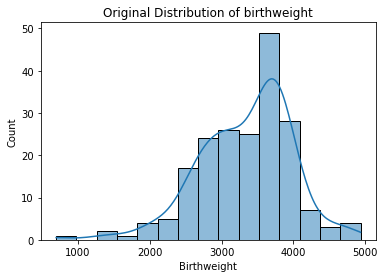

In [912]:
#checking that target variable is normal distribution or not by creating histrogram graph
sns.histplot(data  = birthweight,
         x     = 'bwght',
        kde    = True)

#title and axis labels
plt.title(label   = "Original Distribution of birthweight")
plt.xlabel(xlabel = "Birthweight")
plt.ylabel(ylabel = "Count")

#show the histogram graph
plt.show()

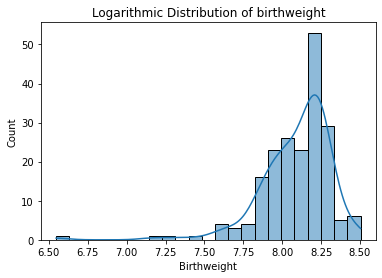

In [913]:
#log transforming of target variable and add it into datatset
birthweight['log_bwght'] = np.log(birthweight['bwght'])


#checking that target variable is normal distribution or not
sns.histplot(data  = birthweight,
         x     = 'log_bwght',
        kde    = True)

#title and axis labels
plt.title(label   = "Logarithmic Distribution of birthweight")
plt.xlabel(xlabel = "Birthweight")
plt.ylabel(ylabel = "Count")

#show the histogram graph
plt.show()

In [914]:
#checking the correlation between features and target variable
birthweight_corr = birthweight.corr(method = 'pearson').round(decimals = 4)#round decimals to 4


#showing the correlations with target variable by sorting
birthweight_corr.loc[: , 'bwght'] \
                .sort_values(ascending = False)

bwght        1.0000
log_bwght    0.9685
fmaps        0.2520
omaps        0.2502
feduc        0.1313
mblck        0.1261
fblck        0.1176
male         0.1149
meduc        0.0942
m_npvis      0.0636
npvis        0.0621
m_feduc     -0.0036
moth        -0.0221
fwhte       -0.0409
monpre      -0.0518
foth        -0.0784
mwhte       -0.1144
m_meduc     -0.1337
fage        -0.3960
mage        -0.4638
cigs        -0.5724
drink       -0.7431
Name: bwght, dtype: float64

In [915]:
#create features by droping bwght, log_bwght, omaps and fmaps
birthweight_data = birthweight.drop(['bwght',
                                     'omaps',
                                     'fmaps',
                                    'log_bwght'],
                                     axis = 1)


#create target variable
birthweight_target = birthweight.loc[: , 'bwght']
birthweight_target_2 = birthweight.loc[: ,'log_bwght']


#preparing training and testing sets for full feature
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(birthweight_data,
                                                                        birthweight_target,
                                                                        test_size = 0.25,
                                                                        random_state = 219)



# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_FULL.shape}
y-side: {y_train_FULL.shape}


Testing Data
------------
X-side: {x_test_FULL.shape}
y-side: {y_test_FULL.shape}
""")



Training Data
-------------
X-side: (147, 18)
y-side: (147,)


Testing Data
------------
X-side: (49, 18)
y-side: (49,)



In [916]:
#looping to make features suitable for statsmodels
for col in birthweight_data:
    print(f"{col} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc +


In [919]:
#merging x_train and y_train so that to be used in statsmodels
birthweight_train = pd.concat([x_train_FULL, y_train_FULL], axis = 1)


#build a statmodel
lm_best = smf.ols(formula =  """bwght ~ mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc""",
data = birthweight_train)


#fit the model based on the data
results = lm_best.fit()



#analyze the summary output to see the p value
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     23.70
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.63e-31
Time:                        19:12:24   Log-Likelihood:                -1064.3
No. Observations:                 147   AIC:                             2163.
Df Residuals:                     130   BIC:                             2213.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2533.2281    209.740     12.078      0.0

In [925]:
#instantiating a linear regression object
lr = LinearRegression()


#fitting to the training data
birthweight_lr_fit = lr.fit(x_train_FULL, y_train_FULL)


#predicting on test data set
birthweight_lr_pred = birthweight_lr_fit.predict(x_test_FULL)


#scoring the results
print('Linear Regression Training Score :', lr.score(x_train_FULL, y_train_FULL).round(4))
print('Linear Regression Testing Score  :', lr.score(x_test_FULL,y_test_FULL).round(4))

#saving scoring data for future use
lr_train_score = lr.score(x_train_FULL, y_train_FULL).round(4)
lr_test_score = lr.score(x_test_FULL,y_test_FULL).round(4)

#finding the gap of score
lr_traintest_gap = abs(lr_train_score - lr_test_score).round(4)

#displaying the gap between training and testing
print('Linear Regression Train-Test Gap :', (lr_traintest_gap).round(4))

Linear Regression Training Score : 0.7447
Linear Regression Testing Score  : 0.5801
Linear Regression Train-Test Gap : 0.1646


In [927]:
#create another set of features by droping more variables that have high P-value
birthweight_data_2 = birthweight.drop(['bwght',
                                     'omaps',
                                     'fmaps',
                                    'meduc',
                                    'monpre',
                                    'feduc',
                                       'fage',
                                       'male',
                                       'npvis',
                                       'mblck',
                                       'fblck',
                                       'm_feduc',
                                      'log_bwght'],
                                     axis = 1)

#preparing training and testing sets of new set of features
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(birthweight_data_2,
                                                            birthweight_target,
                                                            test_size = 0.25,
                                                            random_state = 219)
print(f"""
Training Data\t\t\tTesting Data
-------------\t\t\t-------------                    
X-side: {x_train_2.shape}\t\tX-side: {x_test_2.shape}            
y-side: {y_train_2.shape}\t\t\ty-side: {y_test_2.shape}""")



Training Data			Testing Data
-------------			-------------                    
X-side: (147, 9)		X-side: (49, 9)            
y-side: (147,)			y-side: (49,)


In [928]:
#looping to make features suitable for statsmodels
for cols in birthweight_data_2:
    print(f"{cols} +")

mage +
cigs +
drink +
mwhte +
moth +
fwhte +
foth +
m_meduc +
m_npvis +


In [929]:
# merging x_train and y_train so that they can be used in statsmodels
birthweight_train_2 = pd.concat([x_train_2, y_train_2], axis = 1)


#build a model
lm_best = smf.ols(formula =  """bwght ~ mage +
cigs +
drink +
mwhte +
moth +
fwhte +
foth +
m_meduc +
m_npvis """,
data = birthweight_train_2)

#fit the model based on the data
results = lm_best.fit()


#analyze the summary output to see the p value
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     39.74
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.39e-34
Time:                        19:15:48   Log-Likelihood:                -1070.3
No. Observations:                 147   AIC:                             2161.
Df Residuals:                     137   BIC:                             2190.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5078.3092    137.090     37.044      0.0

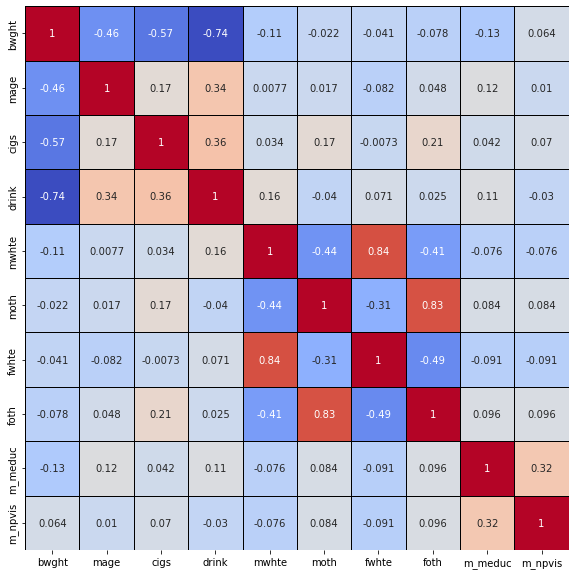

In [931]:
#creating correlation heatmap to find multicollinearity

# setting figure size
fig, ax = plt.subplots(figsize=(10,10))


# limiting the size of the correlation matrix
birthweight_data_2_corr = birthweight.corr(method= 'pearson').loc[['bwght','mage','cigs','drink','mwhte','moth','fwhte','foth','m_meduc','m_npvis'],
                                                                  ['bwght','mage','cigs','drink','mwhte', 'moth','fwhte','foth','m_meduc','m_npvis']]


#visualizing the correlation matrix
sns.heatmap(birthweight_data_2_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)


#displaying the correlation matrix
plt.show()

In [935]:
#instantiating a linear regression object
lr = LinearRegression()


#fitting to the training data
birthweight_lr_fit = lr.fit(x_train_2, y_train_2)


#predicting on test data set
birthweight_lr_pred = birthweight_lr_fit.predict(x_test_2)


#scoring the results
print('Linear Regression Training Score :', lr.score(x_train_2, y_train_2).round(4))
print('Linear Regression Testing Score  :', lr.score(x_test_2,y_test_2).round(4))
#saving scoring data for future use
lr_train_score_2 = lr.score(x_train_2, y_train_2).round(4)
lr_test_score_2 = lr.score(x_test_2,y_test_2).round(4)

#finding the gap of score
lr_traintest_gap_2 = abs(lr_train_score_2 - lr_test_score_2).round(4)

# displaying the gap between training and testing
print('Linear Regression Train-Test Gap :',(lr_traintest_gap_2).round(4))

Linear Regression Training Score : 0.723
Linear Regression Testing Score  : 0.6471
Linear Regression Train-Test Gap : 0.0759


In [936]:
#instantiating a lasso regression object with alpha = 1
lasso_model = Lasso(alpha = 1.0,normalize = True) # default magitude


#fitting to the training data
lasso_fit = lasso_model.fit(x_train_2, y_train_2)


#predicting on test data set
lasso_pred = lasso_fit.predict(x_test_2)


#scoring the results
print('Lasso Training Score :', lasso_model.score(x_train_2, y_train_2).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_2, y_test_2).round(4))


#saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_2, y_train_2).round(4)
lasso_test_score  = lasso_model.score(x_test_2, y_test_2).round(4)

#finding the gap of score
lasso_traintest_gap = abs(lasso_train_score - lasso_test_score).round(4)

# displaying  the gap between training and testing
print('Lasso Train-Test Gap :', (lasso_traintest_gap).round(4))

Lasso Training Score : 0.7198
Lasso Testing Score  : 0.6615
Lasso Train-Test Gap : 0.0583


In [937]:
#instantiating a ARD regression object
ard_model = ARDRegression()


#fitting to the training data
ard_fit = ard_model.fit(x_train_2,y_train_2)


#predicting on test data set
ard_pred = ard_fit.predict(x_test_2)

#scoring the results
print('Training Score:', ard_model.score(x_train_2, y_train_2).round(4))
print('Testing Score :', ard_model.score(x_test_2, y_test_2).round(4))


#saving scoring data for future use
ard_train_score = ard_model.score(x_train_2, y_train_2).round(4)
ard_test_score  = ard_model.score(x_test_2, y_test_2).round(4)

#finding the gap of score
ard_traintest_gap = abs(ard_train_score - ard_test_score).round(4)

# displaying the gap between training and testing
print('ARD Train-Test Gap :', (ard_traintest_gap).round(4))


Training Score: 0.7184
Testing Score : 0.6584
ARD Train-Test Gap : 0.06


In [938]:
#create new set of feature to make it into same scale
birthweight_data_3 = birthweight.drop(['bwght',
                                     'omaps',
                                     'fmaps',
                                    'meduc',
                                    'monpre',
                                       'feduc',
                                       'fage',
                                       'male',
                                       'npvis',
                                       'm_npvis',
                                       'm_meduc',
                                      'm_feduc',
                                      'log_bwght'],
                                     axis = 1)


#instantiatinga StandardScaler() object
scaler = StandardScaler()


#fitting the scaler with housing_data
scaler.fit(birthweight_data_3)


#transforming our data after fit
x_scaled = scaler.transform(birthweight_data_3)


#converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


#creating columns to x_scaled_df
x_scaled_df.columns = birthweight_data_3.columns

# checking the results
x_scaled_df.describe().round(2)

,mage,cigs,drink,mwhte,mblck,moth,fwhte,fblck,foth
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-1.80,-1.80,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67
25%,-0.70,-0.81,-0.47,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67
50%,-0.11,0.01,-0.13,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67
75%,0.57,0.71,0.62,1.64,1.27,1.37,1.37,1.39,1.49
max,3.02,2.31,2.87,1.64,1.27,1.37,1.37,1.39,1.49


In [939]:
#preparing training and testing sets for scaler feature
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_scaled_df,
                                                            birthweight_target,
                                                            test_size = 0.25,
                                                                random_state = 219)


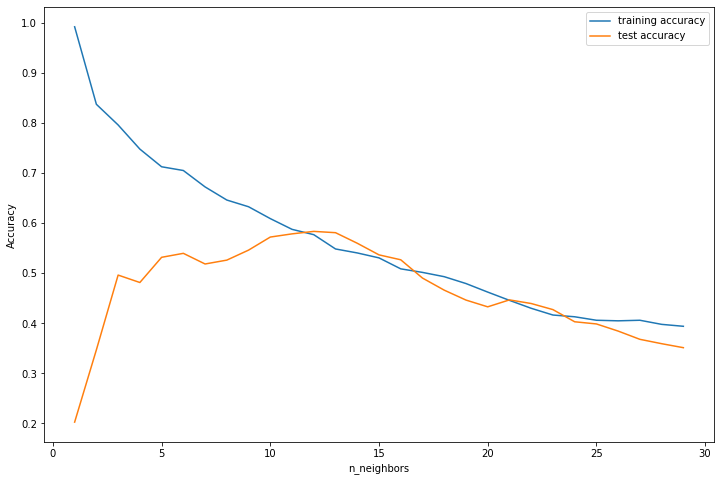

The optimal number of neighbors is 12


In [940]:
#creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


#building a visualization of 1 to 30 neighbors
neighbors_settings = range(1, 30)


for n_neighbors in neighbors_settings:
    #building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_3, y_train_3)
    
    #recording the training set accuracy
    training_accuracy.append(clf.score(x_train_3, y_train_3))
    
    #recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_3, y_test_3))


#plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


#finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [944]:
#instantiating a K-nearest neighbors object
knn_model = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 12)


#fitting the training data
knn_fit = knn_model.fit(x_train_3,y_train_3)


#predicting on new data
knn_pred = knn_fit.predict(x_test_3)

#scoring the result
print('Training Score:', knn_model.score(x_train_3, y_train_3).round(4))
print('Testing Score :', knn_model.score(x_test_3, y_test_3).round(4))


#saving scoring data for future use
knn_train_score = knn_model.score(x_train_3, y_train_3).round(4)
knn_test_score  = knn_model.score(x_test_3, y_test_3).round(4)

#finding the gap of score
knn_traintest_gap = abs(knn_train_score - knn_test_score).round(4)

#displaying the gap between training and testing
print('ARD Train-Test Gap :', (knn_traintest_gap).round(4))


Training Score: 0.5772
Testing Score : 0.5838
ARD Train-Test Gap : 0.0066


In [946]:
#summary of model

print(f"""
My Final Model is
  Model\t\t\t alpha\tTrain Score\tTest Score\t  Gap
---------\t\t-------\t------------\t------------\t-------
Lasso Regression\t 1.00\t   {lasso_train_score}\t   {lasso_test_score}\t {lasso_test_gap}


    Model           Train Score   Test Score     Gap
----------------    -----------    ----------   -------
Linear Regression     {lr_train_score_2}         {lr_test_score_2}      {lr_traintest_gap_2}
Lasso Regression      {lasso_train_score}        {lasso_test_score}      {lasso_traintest_gap}        
ARD Regression        {ard_train_score}        {ard_test_score }      {ard_traintest_gap}
KNN                   {knn_train_score}        {knn_test_score}      {knn_traintest_gap}
""")



My Final Model is
  Model			 alpha	Train Score	Test Score	  Gap
---------		-------	------------	------------	-------
Lasso Regression	 1.00	   0.7198	   0.6615	 0.0583


    Model           Train Score   Test Score     Gap
----------------    -----------    ----------   -------
Linear Regression     0.723         0.6471      0.0759
Lasso Regression      0.7198        0.6615      0.0583        
ARD Regression        0.7184        0.6584      0.06
KNN                   0.5772        0.5838      0.0066

